In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [2]:
df = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\data\housing\2007-2020-Hosuing Inventory Count-Counts-by-State.xlsx - 2020.csv')

In [3]:
df.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,1885,1347,1122,59.52%,1410,475,0,194,722,...,92,92,92,100.00%,4,8,84,0,0,0
1,AL,2913,2291,1659,56.95%,1992,887,34,411,1134,...,40,40,32,80.00%,0,0,40,0,0,0
2,AR,1686,1193,680,40.33%,1330,356,0,181,617,...,0,0,0,.,0,0,0,0,0,0
3,AZ,6079,4943,4352,71.59%,3632,2370,77,821,2876,...,346,346,346,100.00%,75,294,52,0,33,10
4,CA,53265,48649,35666,66.96%,38241,14760,264,7344,23569,...,8707,8618,6185,71.03%,849,2684,6011,12,464,171


In [4]:
df.isnull().sum()

State                                                       0
Total Year-Round Beds (ES, TH, SH)                          0
Total Non-DV Year-Round Beds (ES, TH, SH)                   0
Total HMIS Year-Round Beds (ES, TH, SH)                     0
HMIS Participation Rate for Year-Round Beds (ES, TH, SH)    0
                                                           ..
Total Beds for Households with Children (OPH)               0
Total Beds for Households without Children (OPH)            0
Total Beds for Households with only Children (OPH)          0
Dedicated Veteran Beds (OPH)                                0
Dedicated Youth Beds (OPH)                                  0
Length: 77, dtype: int64

In [5]:
df.nunique()

State                                                       56
Total Year-Round Beds (ES, TH, SH)                          56
Total Non-DV Year-Round Beds (ES, TH, SH)                   55
Total HMIS Year-Round Beds (ES, TH, SH)                     56
HMIS Participation Rate for Year-Round Beds (ES, TH, SH)    55
                                                            ..
Total Beds for Households with Children (OPH)               37
Total Beds for Households without Children (OPH)            43
Total Beds for Households with only Children (OPH)           6
Dedicated Veteran Beds (OPH)                                25
Dedicated Youth Beds (OPH)                                  14
Length: 77, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 77 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   State                                                      56 non-null     object
 1   Total Year-Round Beds (ES, TH, SH)                         56 non-null     int64 
 2   Total Non-DV Year-Round Beds (ES, TH, SH)                  56 non-null     int64 
 3   Total HMIS Year-Round Beds (ES, TH, SH)                    56 non-null     int64 
 4   HMIS Participation Rate for Year-Round Beds (ES, TH, SH)   56 non-null     object
 5   Total Year-Round Beds (ES)                                 56 non-null     int64 
 6   Total Year-Round Beds (TH)                                 56 non-null     int64 
 7   Total Year-Round Beds (SH)                                 56 non-null     int64 
 8   Total Units for Househ

In [7]:
df.shape

(56, 77)

In [8]:
# For NULL values we will keep those columns which has around 50% of NAN data

n =int( 0.5 * df.shape[0])

# For Unique values we will keep only those columns which has around 25% of unique values
p = int(0.1 * df.shape[0])

col = df.columns
for i in range(len(col)):
    if df[col[i]].isnull().sum() > n:
        df.drop([col[i]] , axis= 1 , inplace= True)

# After dropping some columns we will make around list of columns
col = df.select_dtypes('object').columns

for i in range(len(col)):
    if df[col[i]].nunique() > p:
        df.drop([col[i]] , axis=1 , inplace=True)

In [9]:
df.shape

(56, 69)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 69 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   Total Year-Round Beds (ES, TH, SH)                         56 non-null     int64
 1   Total Non-DV Year-Round Beds (ES, TH, SH)                  56 non-null     int64
 2   Total HMIS Year-Round Beds (ES, TH, SH)                    56 non-null     int64
 3   Total Year-Round Beds (ES)                                 56 non-null     int64
 4   Total Year-Round Beds (TH)                                 56 non-null     int64
 5   Total Year-Round Beds (SH)                                 56 non-null     int64
 6   Total Units for Households with Children (ES, TH, SH)      56 non-null     int64
 7   Total Beds for Households with Children (ES, TH, SH)       56 non-null     int64
 8   Total Beds for Households withou

In [11]:
df.nunique()

Total Year-Round Beds (ES, TH, SH)                    56
Total Non-DV Year-Round Beds (ES, TH, SH)             55
Total HMIS Year-Round Beds (ES, TH, SH)               56
Total Year-Round Beds (ES)                            56
Total Year-Round Beds (TH)                            56
                                                      ..
Total Beds for Households with Children (OPH)         37
Total Beds for Households without Children (OPH)      43
Total Beds for Households with only Children (OPH)     6
Dedicated Veteran Beds (OPH)                          25
Dedicated Youth Beds (OPH)                            14
Length: 69, dtype: int64

In [12]:
df.head()

,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)",...,Dedicated Chronically Homeless Beds (PSH),Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,1885,1347,1122,1410,475,0,194,722,1141,22,...,459,92,92,92,4,8,84,0,0,0
1,2913,2291,1659,1992,887,34,411,1134,1736,43,...,943,40,40,32,0,0,40,0,0,0
2,1686,1193,680,1330,356,0,181,617,1069,0,...,22,0,0,0,0,0,0,0,0,0
3,6079,4943,4352,3632,2370,77,821,2876,3170,33,...,1903,346,346,346,75,294,52,0,33,10
4,53265,48649,35666,38241,14760,264,7344,23569,29515,181,...,23391,8707,8618,6185,849,2684,6011,12,464,171


In [13]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

Series([], dtype: float64)


In [14]:
time_series_plot(df)


To check time series of numeric data  by daily, monthly and yearly frequency


In [16]:
top5(df)


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
"Total Year-Round Beds (ES, TH, SH)",56.0,14148.178571,53730.342550,30.0,1576.25,3127.0,7236.75,396149.0
"Total Non-DV Year-Round Beds (ES, TH, SH)",56.0,12387.535714,47275.676883,0.0,1190.50,2667.0,6350.25,346851.0
"Total HMIS Year-Round Beds (ES, TH, SH)",56.0,10248.857143,39224.359445,0.0,913.75,2305.0,4859.50,286968.0
Total Year-Round Beds (ES),56.0,10771.035714,41346.580701,30.0,1229.25,2199.0,4881.00,301589.0
Total Year-Round Beds (TH),56.0,3294.928571,12312.925594,0.0,415.50,1014.0,2242.75,92258.0
...,...,...,...,...,...,...,...,...
Total Beds for Households with Children (OPH),56.0,1019.535714,3881.300307,0.0,0.00,90.5,468.75,28547.0
Total Beds for Households without Children (OPH),56.0,759.750000,2927.782830,0.0,9.00,110.5,383.00,21273.0
Total Beds for Households with only Children (OPH),56.0,2.035714,8.636001,0.0,0.00,0.0,0.00,57.0
Dedicated Veteran Beds (OPH),56.0,57.392857,222.060080,0.0,0.00,0.5,29.00,1607.0


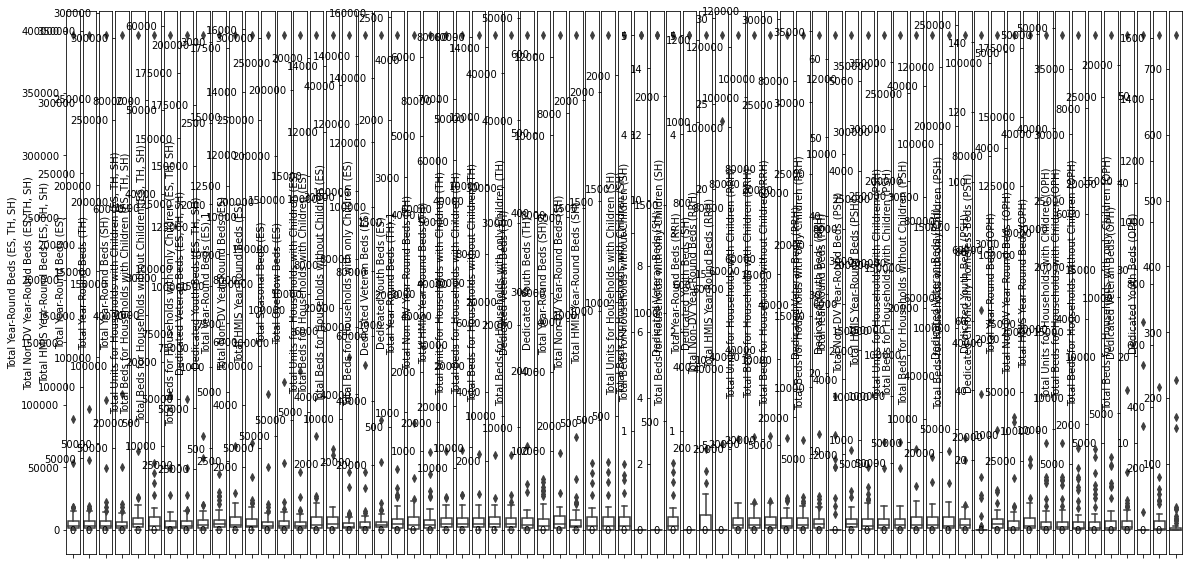


To check pairwise joint distribution of numeric data


KeyboardInterrupt: 

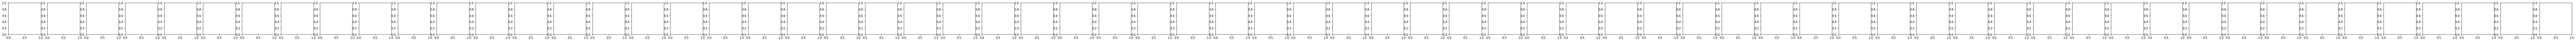